# Import and Load

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
#loading Mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Testing Shape

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Plot

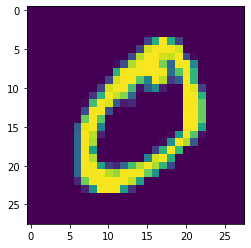

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [10]:
y_train[1]

0

# Scaling

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Reshaping

In [13]:
x_train=x_train.reshape((60000,784))
x_test=x_test.reshape((10000,784))

In [14]:
x_train[1].shape

(784,)

# Converting Into Categoriacal Using One hot Encoding

In [15]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense 
model = Sequential()

In [18]:
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile 

In [19]:
model.compile(optimizer='sgd',loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.4314 - accuracy: 0.8827
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.2450 - accuracy: 0.9306
Epoch 3/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.1932 - accuracy: 0.9454
Epoch 4/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1600 - accuracy: 0.9546
Epoch 5/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1372 - accuracy: 0.9617
Epoch 6/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1204 - accuracy: 0.9661
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1073 - accuracy: 0.9703
Epoch 8/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0966 - accuracy: 0.9726
Epoch 9/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0878 - accuracy: 0.9757
Epoch 10/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.080

# Evaluate

In [21]:
loss,accuracy=model.evaluate(x_test,y_test,batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9717


In [22]:
model.evaluate??

In [23]:
y_predict = model.predict(x_test)
y_predict

array([[6.6789230e-06, 3.1140593e-07, 5.0191389e-04, ..., 9.9878734e-01,
        9.8770515e-06, 2.9405261e-05],
       [3.0257861e-05, 1.1476103e-05, 9.9828440e-01, ..., 9.9802855e-10,
        2.0177843e-04, 6.9141043e-10],
       [2.0396719e-05, 9.9122590e-01, 2.5248637e-03, ..., 2.7502400e-03,
        2.1784676e-03, 1.0209298e-04],
       ...,
       [3.3325762e-09, 1.4991901e-09, 3.1448273e-08, ..., 9.4614270e-06,
        4.5303288e-05, 1.5255633e-04],
       [5.6033095e-06, 7.0157430e-06, 2.0929743e-07, ..., 9.1911181e-07,
        1.0576074e-02, 1.2428362e-06],
       [7.6497972e-06, 2.3535094e-09, 6.6840412e-06, ..., 5.8327632e-09,
        6.6375996e-08, 3.3332242e-08]], dtype=float32)

In [26]:
import numpy as np
np.argmax(y_predict[1])

2

In [28]:
np.argmax(y_test[1])

2